In [1]:
%autosave 0

Autosave disabled


数据可以去找：搜狗实验室 搜狐 新闻文本

In [3]:
import warnings
warnings.filterwarnings("ignore")
import jieba
import numpy
import codecs
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud

## 1.读取数据，分词

In [4]:
df = pd.read_csv("./data/car_news.csv", encoding="utf-8")
df = df.dropna()
content = df.content.values.tolist()
segment = []
for line in content:
    try:
        segs = jieba.lcut(line)
        for seg in segs:
            if len(seg) > 1 and seg != '\r\n':
                segment.append(seg)
    except:
        print(line)
        continue

## 2.去停用词

In [6]:
words_df = pd.DataFrame({'segment': segment})
words_df.head()
stopwords = pd.read_csv("./data/stopwords.txt", index_col=False, quoting=3, sep="\t", names=['stopwords'], encoding='utf-8')
stopwords.head()
words_df = words_df[~words_df.segment.isin(stopwords)]

## 3.统计词频

In [7]:
words_stat = words_df.groupby(by=['segment'])['segment'].agg({"计数": numpy.size})
words_stat = words_stat.reset_index().sort_values(by=["计数"], ascending=False)
words_stat.head()

,segment,计数
23902,汽车,7074
6826,中国,2681
17209,市场,2429
21248,新能源,2165
13741,品牌,1844


## 4.词云展示

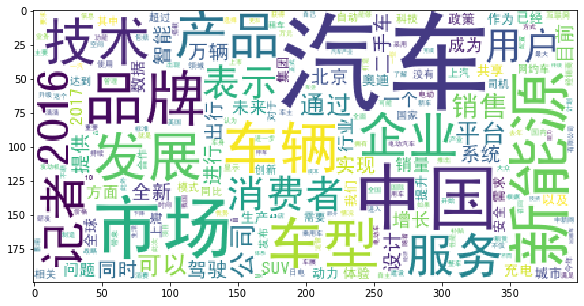

In [8]:
wordcloud = WordCloud(font_path="./data/simhei.ttf", background_color="white", max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud = wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

### 加背景图片

In [10]:
from scipy.misc import imread
matplotlib.rcParams['figure.figsize'] = (15.0,15.0)
from wordcloud import WordCloud, ImageColorGenerator

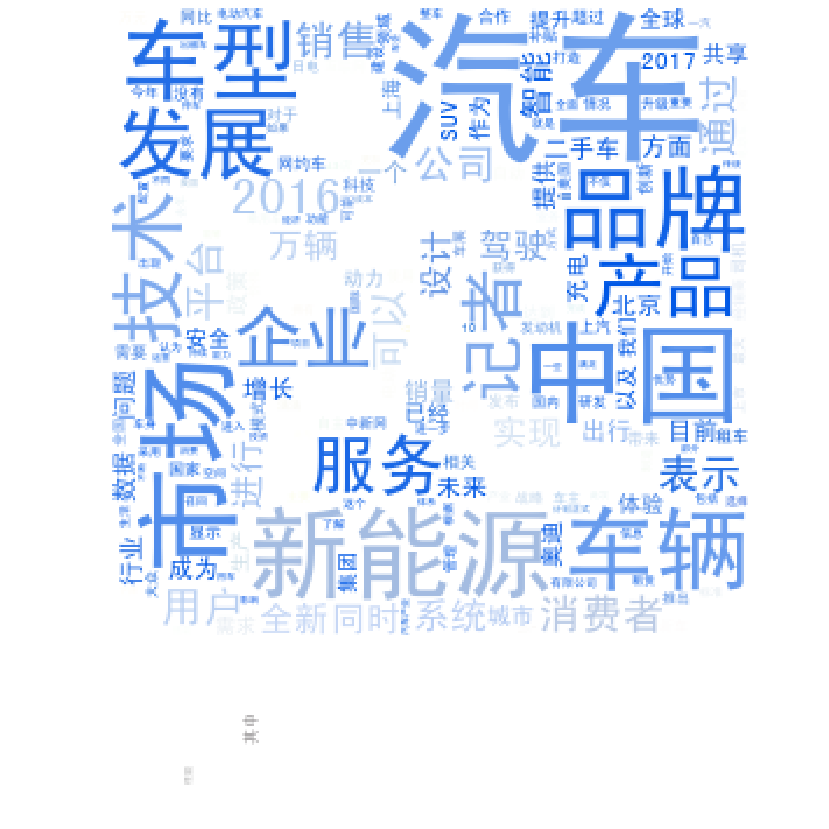

In [12]:
bimg = imread('./image/sports.jpeg')
wordcloud = WordCloud(background_color="white", mask=bimg, font_path='./data/simhei.ttf', max_font_size=200)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud = wordcloud.fit_words(word_frequence)
bimgColors = ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))